In [ ]:
!ls | grep total

In [ ]:
!ls

sample_data


In [ ]:
!python3 -m spacy download es
!pip3 install stop_words
!pip3 install stopwords
!pip install pyLDAvis

     |████████████████████████████████| 16.2MB 1.2MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172936 sha256=967f728c26a32ae4e396bcf632a93806b1618ab352de6580337e01118059eb30
  Stored in directory: /tmp/pip-ephem-wheel-cache-d1goc1de/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=688f2707b9e8fb221f3d5939b9a73be26f88be1286a25f41a19561e7317943cf
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
     |████████████████████████

In [ ]:
import nltk
nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/total_t.csv', lineterminator='\n', index_col=0)

In [ ]:

df.head()

,usuario,texto,full_place,id,fecha
0,lebresol,@Arkitektoplus @ElJulesOlivar Nos estamos tard...,"Mérida, Yucatán",1252669413289058311,2020-04-21 13:43:56-05:00
1,tavosanchezmx,En esta cuarentena solo estoy soando pura pend...,"Monterrey, Nuevo León",1252669425666281477,2020-04-21 13:43:59-05:00
2,ChicanActivXt,@EspinozaOficial Porque no haces video en vivo...,"Matamoros, Tamaulipas",1252671344522772486,2020-04-21 13:51:36-05:00
3,jorgenunez63,". En plena crisis por la pandemia, sigue prese...","Centro, Tabasco",1252695517567619079,2020-04-21 15:27:40-05:00
4,josearturoloya3,@NATREY90 Correcto #AmloElMejorPresidenteDelMu...,"Delicias, Chihuahua",1252695827694354434,2020-04-21 15:28:53-05:00


In [ ]:
docs=df['texto'].to_list()

In [ ]:
docs[:10]

['@Arkitektoplus @ElJulesOlivar Nos estamos tardando para hacer justicia de este terrorista carroero @FelipeCalderon  #BoicotTVAzteca  #QuedateEnCasa  #AMLOLujoDePresidente',
 'En esta cuarentena solo estoy soando pura pendejadas ',
 '@EspinozaOficial Porque no haces video en vivo para los que esten en cuarentena?? ',
 '. En plena crisis por la pandemia, sigue presente la lucha politica entre grupos ideologicos irreconciliables. Esto es lamentable, porque muchos veian en esta coyuntura la oportunidad de unidad de los mexicanos. Que desolador. https://t.co/PyGOFUBAfu',
 '@NATREY90 Correcto #AmloElMejorPresidenteDelMundo #QuedateEnCasa',
 ' Creating the best moments!  Reservations:  Mex: +52 (322) 193 7821  USA/CAN: +1 (206) 414 5139  info@vallartastays.com  https://t.co/yudV1E4xKm #VallartaStays #VallartaLovers #PuertoVallarta #Beach #Vacations #Mexico #Paradise #QuedateEnCasa #StayHome https://t.co/jMDwq2gRzj',
 '@Cecevich ES UN VIRUS SE DETUVO LA ECONOMIA.',
 '@Elizabe94900102 @Donist

In [ ]:
import re, string
def remove_Htt(text):
    return re.sub(r'https://*\S*', "", text)
    
def remove_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('utf-8')

In [ ]:
docs=[remove_punctuation(remove_Htt(i.lower())) for i in docs]

In [ ]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in docs]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' arkitektoplus eljulesolivar nos estamos tardando para hacer justicia de '
 'este terrorista carroero felipecalderon boicottvazteca quedateencasa '
 'amlolujodepresidente']


In [ ]:
data[:1]

[' arkitektoplus eljulesolivar nos estamos tardando para hacer justicia de este terrorista carroero felipecalderon boicottvazteca quedateencasa amlolujodepresidente']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['arkitektoplus', 'eljulesolivar', 'nos', 'estamos', 'tardando', 'para', 'hacer', 'justicia', 'de', 'este', 'terrorista', 'carroero', 'felipecalderon', 'boicottvazteca', 'quedateencasa']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['arkitektoplus', 'eljulesolivar', 'nos', 'estamos', 'tardando', 'para', 'hacer', 'justicia', 'de', 'este', 'terrorista', 'carroero', 'felipecalderon', 'boicottvazteca', 'quedateencasa']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[[]]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.065*"virus" + 0.037*"crisis" + 0.026*"pue" + 0.014*"salud" + '
  '0.010*"situacion" + 0.009*"trave" + 0.008*"paciente" + 0.008*"paise" + '
  '0.008*"mese" + 0.007*"muerte"'),
 (1,
  '0.022*"despue" + 0.016*"cdmx" + 0.015*"plan" + 0.015*"poder" + 0.013*"nio" '
  '+ 0.012*"covid" + 0.010*"cuarentena" + 0.009*"favor" + 0.009*"pobre" + '
  '0.007*"sale"'),
 (2,
  '0.031*"pandemia" + 0.024*"puede" + 0.016*"dio" + 0.013*"sntesalud" + '
  '0.010*"personal" + 0.008*"millone" + 0.008*"felizjueve" + '
  '0.008*"alimentacion" + 0.007*"video" + 0.007*"pueblo"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.718274743682933

Coherence Score:  0.4949370273264919


In [ ]:
!pip3 install pyLDAvis

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.225380 -0.009667       1        1  42.230164
1      0.122293 -0.165322       2        1  30.476612
2      0.103087  0.174989       3        1  27.293226, topic_info=             Term         Freq        Total Category  logprob  loglift
9           virus  8666.000000  8666.000000  Default  30.0000  30.0000
80         crisis  4922.000000  4922.000000  Default  29.0000  29.0000
392      pandemia  2693.000000  2693.000000  Default  28.0000  28.0000
37            pue  3531.000000  3531.000000  Default  27.0000  27.0000
108         puede  2116.000000  2116.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
3359   felizjueve   711.461304   722.858704   Topic3  -4.7998   1.2826
445          bebe   379.228973   381.657837   Topic3  -5.4290   1.2921
752    prioridade   322.118164   323.534027   Topic3  -5.5922   1.2941
37636    mohammad   356.033569  1168.332642   Topic3  -5.4921   0.1102
37637      yemeni   344.776154  1109.743408   Topic3  -5.5242   0.1295

[132 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
363        1  0.999205     actividade
1074       3  0.996875         actual
140        2  0.998690  aguascaliente
1348       1  0.001417   alimentacion
1348       2  0.001417   alimentacion
...      ...       ...            ...
714        2  0.998153     vulnerable
196        1  0.997818       whatsapp
37637      1  0.328004         yemeni
37637      2  0.361345         yemeni
37637      3  0.310883         yemeni

[121 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_nostops)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4247,"virus, crisis, pue, salud, situacion, trave, p...","[arkitektoplus, eljulesolivar, tardando, hacer..."
1,1,0.0,0.4247,"virus, crisis, pue, salud, situacion, trave, p...","[cuarentena, solo, soando, pura, pendejadas]"
2,2,0.0,0.4192,"virus, crisis, pue, salud, situacion, trave, p...","[espinozaoficial, haces, video, vivo, esten, c..."
3,3,0.0,0.4247,"virus, crisis, pue, salud, situacion, trave, p...","[plena, crisis, pandemia, sigue, presente, luc..."
4,4,0.0,0.4247,"virus, crisis, pue, salud, situacion, trave, p...","[natrey, correcto, quedateencasa]"
5,5,0.0,0.4032,"virus, crisis, pue, salud, situacion, trave, p...","[creating, the, best, moments, reservations, m..."
6,6,0.0,0.4309,"virus, crisis, pue, salud, situacion, trave, p...","[cecevich, virus, detuvo, economia]"
7,7,0.0,0.4219,"virus, crisis, pue, salud, situacion, trave, p...","[elizabe, donistorres, elmajeporteno, luisguti..."
8,8,0.0,0.4238,"virus, crisis, pue, salud, situacion, trave, p...","[cupon, balido, unas, chelas, pase, valido, da..."
9,9,0.0,0.4247,"virus, crisis, pue, salud, situacion, trave, p...","[ferka, ps, saldremos, mas, kilos, pandemia]"


X = vect.fit_transform(doc_clean)
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
ldamodel = gensim.models.ldamodel.LdaModel (corpus, num_topics=10, id2word=id_map, passes=25, random_state=34)


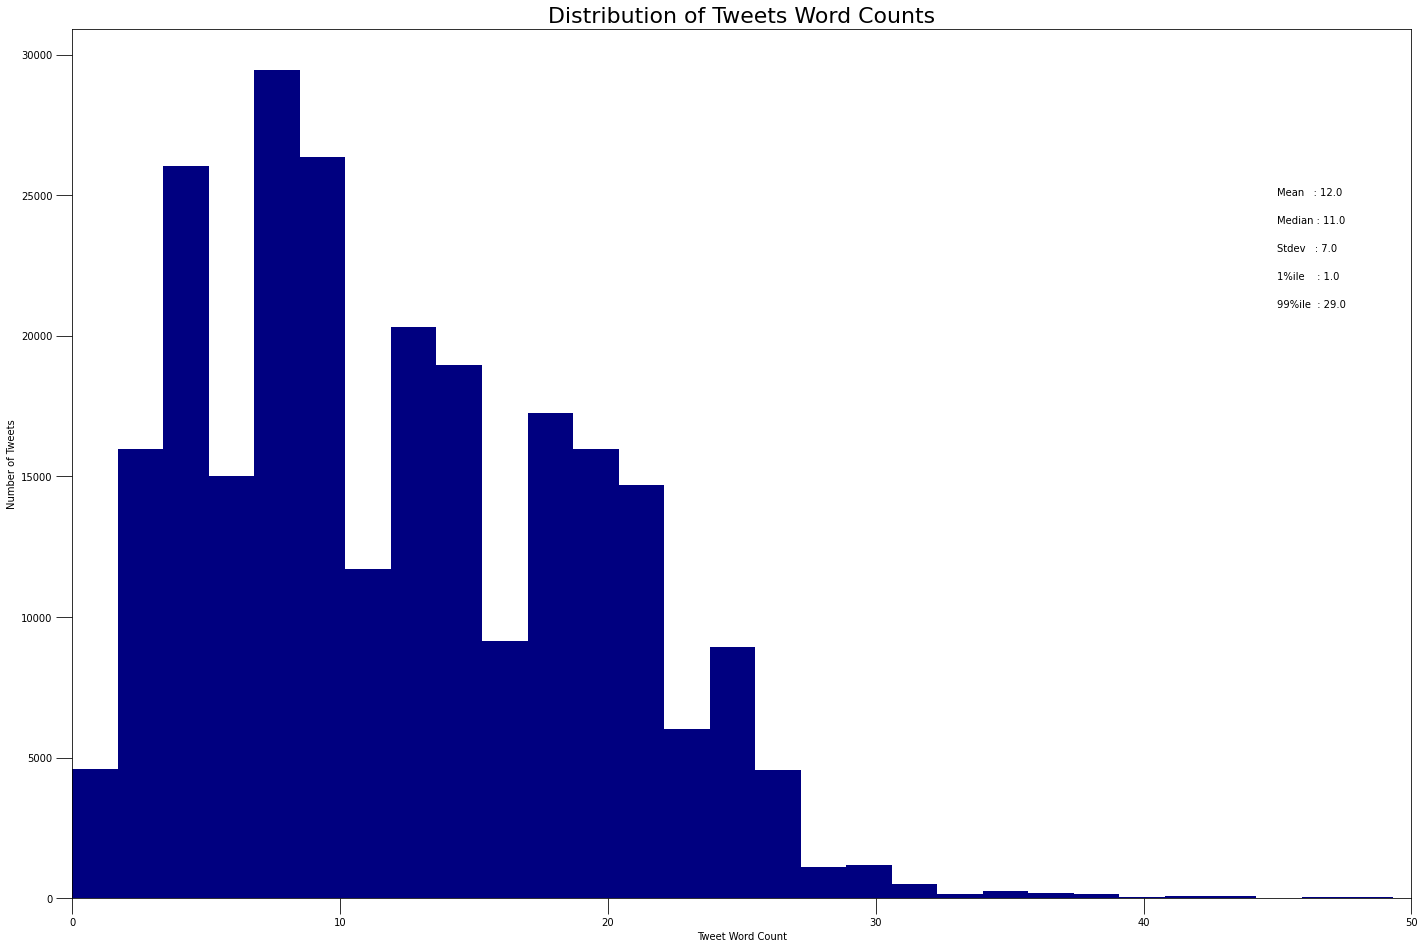

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(24,16))
plt.hist(doc_lens, bins = 50, color='navy')
plt.text(45, 25000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(45, 24000, "Median : " + str(round(np.median(doc_lens))))
plt.text(45, 23000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(45, 22000, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(45, 21000, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 50), ylabel='Number of Tweets', xlabel='Tweet Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Tweets Word Counts', fontdict=dict(size=22))
plt.show()

IndexError: ignored

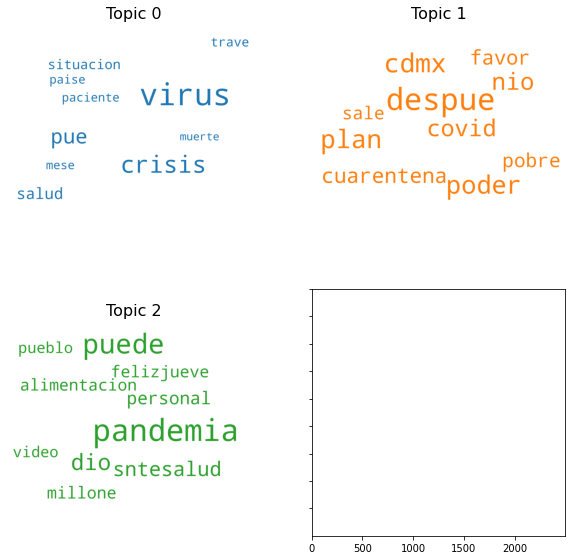

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

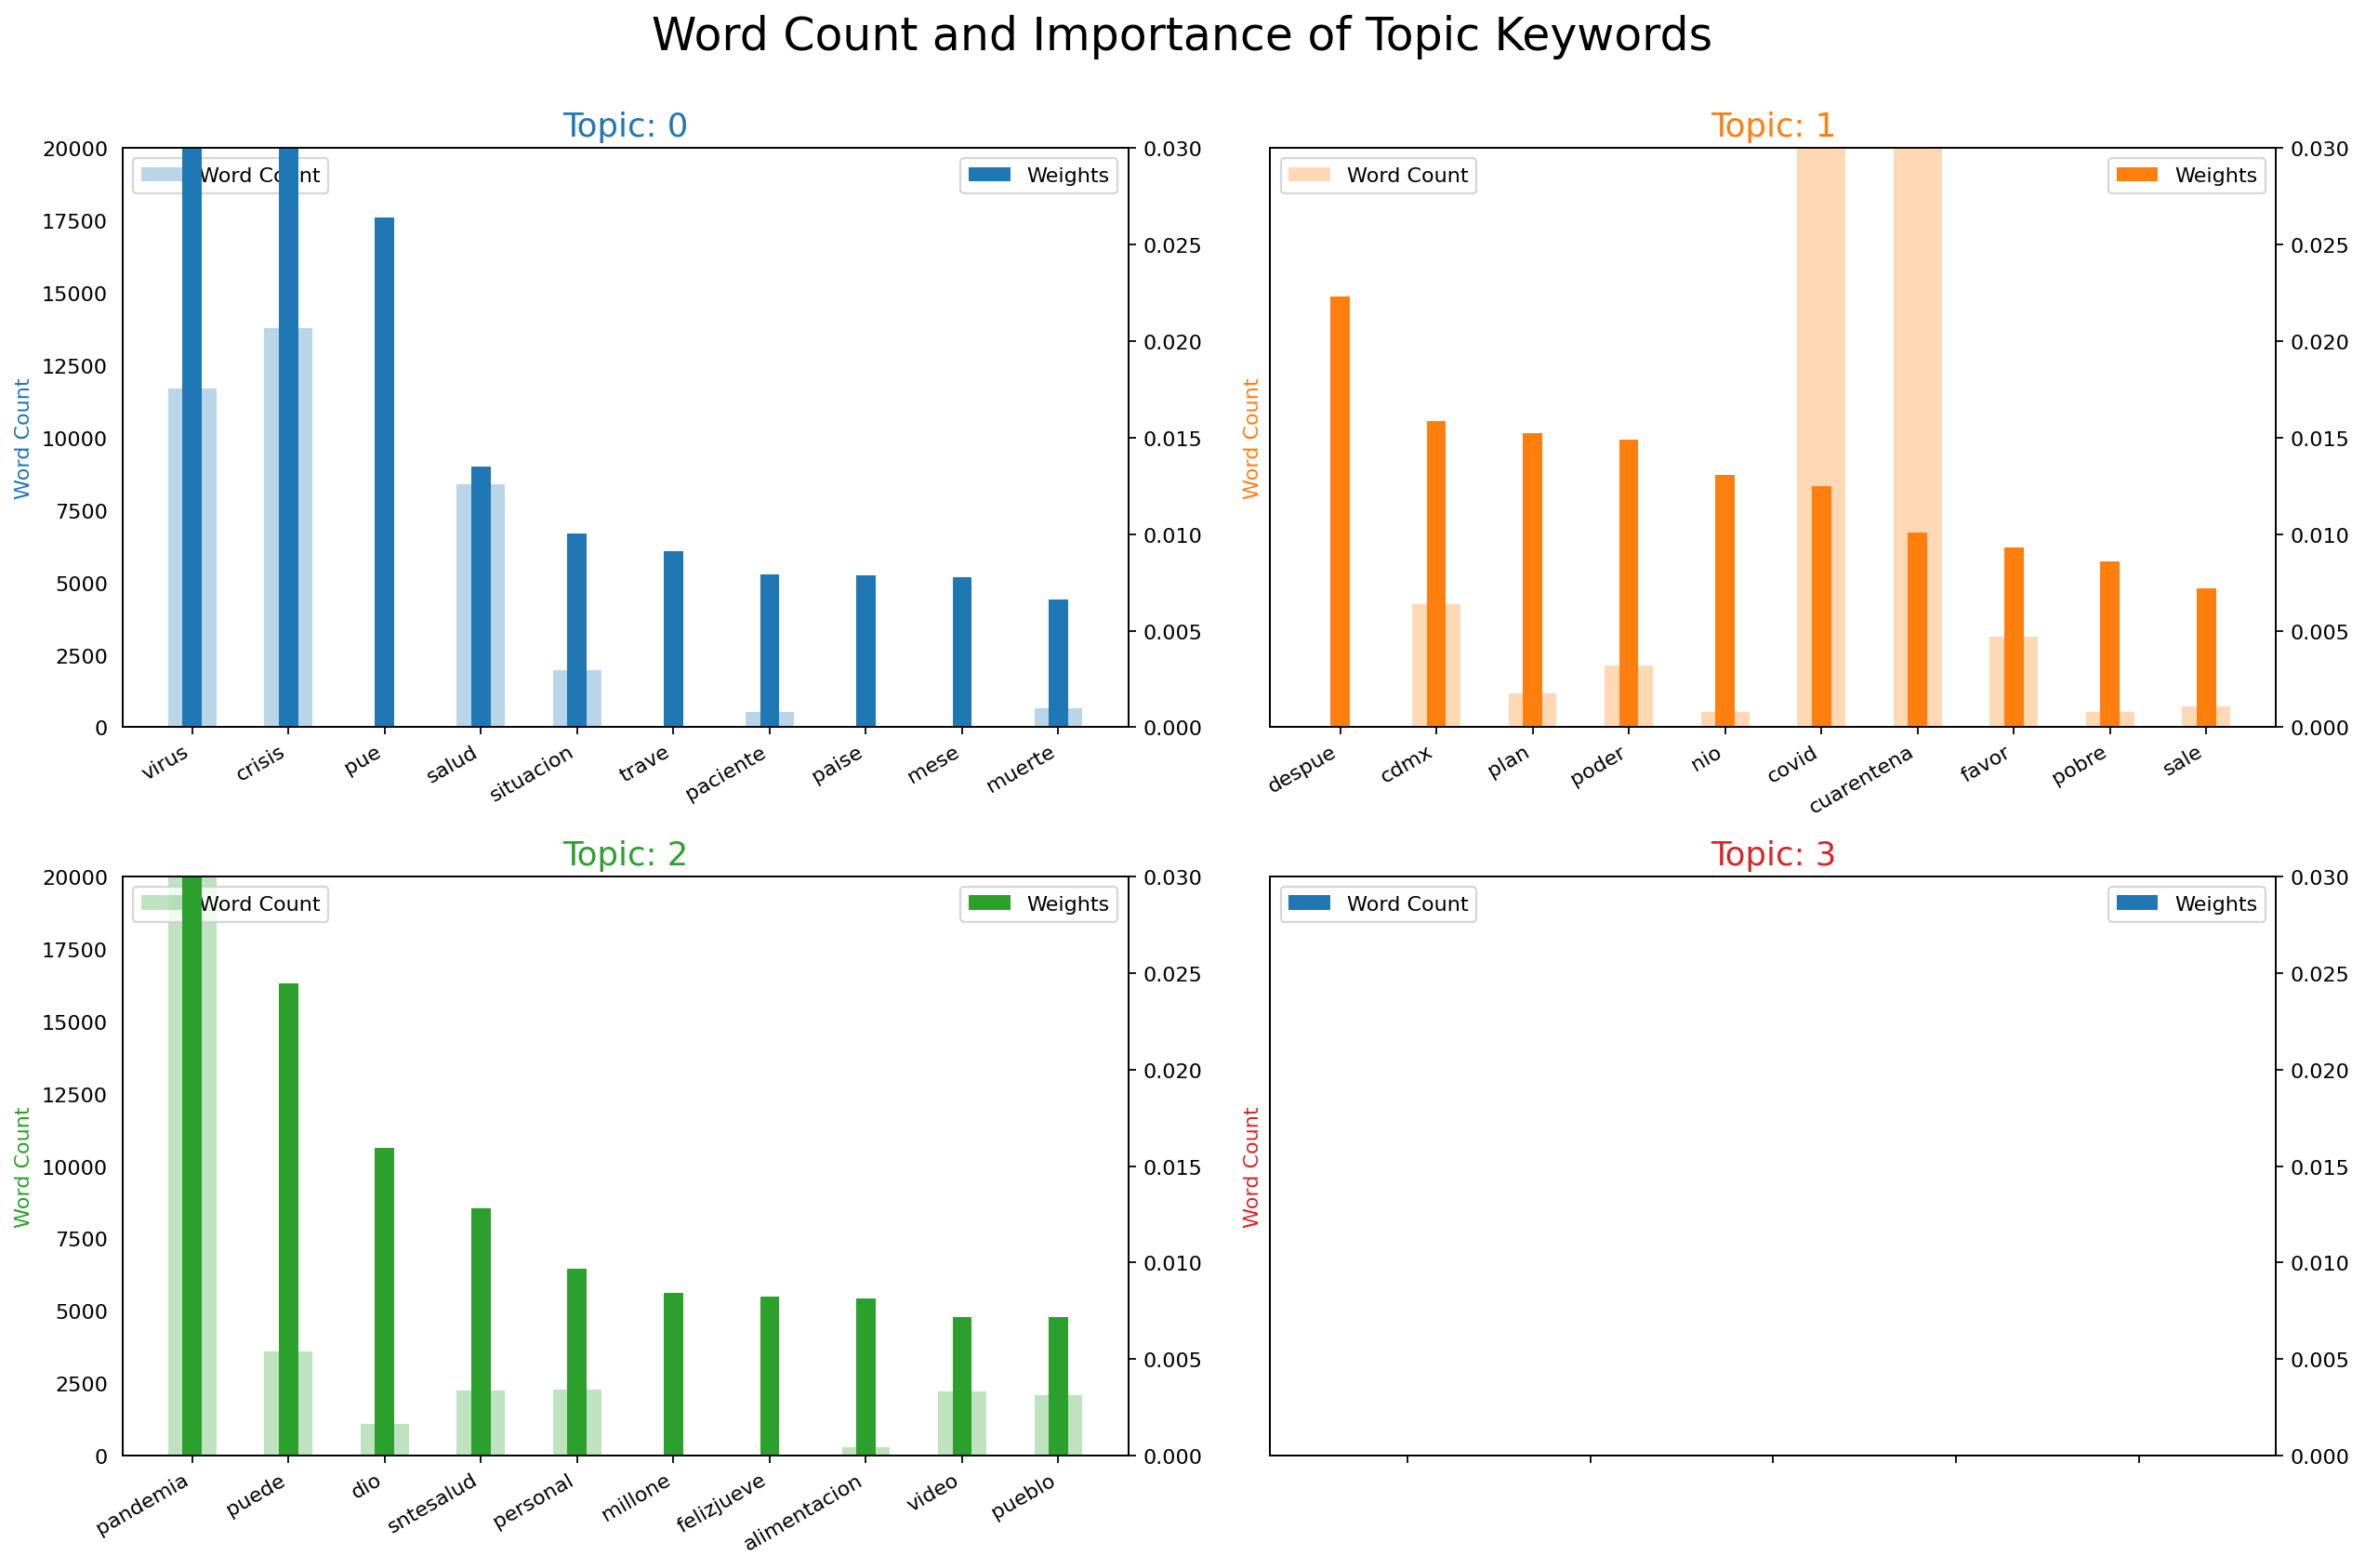

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words_nostops for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 20000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

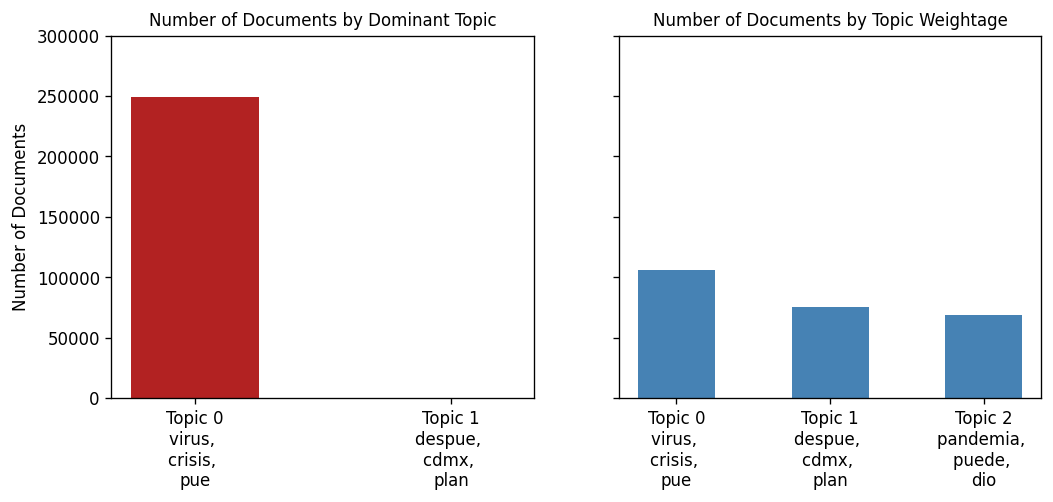

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 300000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()